<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Boxplot

<ipython-input-5-7a440d8d7e82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=boston_df['MEDV'],width=0.9,palette='Set2')


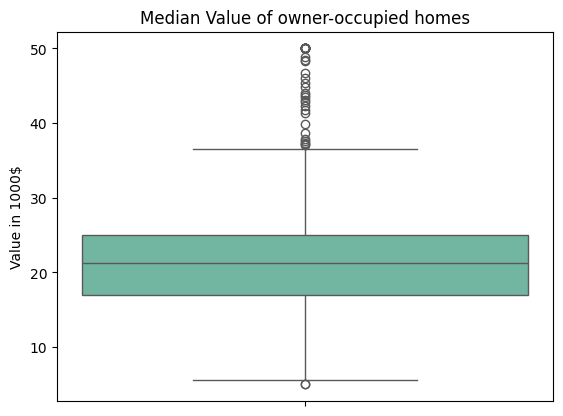

In [5]:
import matplotlib.pyplot as plt
sns.boxplot( data=boston_df['MEDV'],width=0.9,palette='Set2')
plt.title('Median Value of owner-occupied homes')
plt.ylabel('Value in 1000$')
plt.show()

Bar plot

In [6]:
df=boston_df['CHAS'].value_counts()

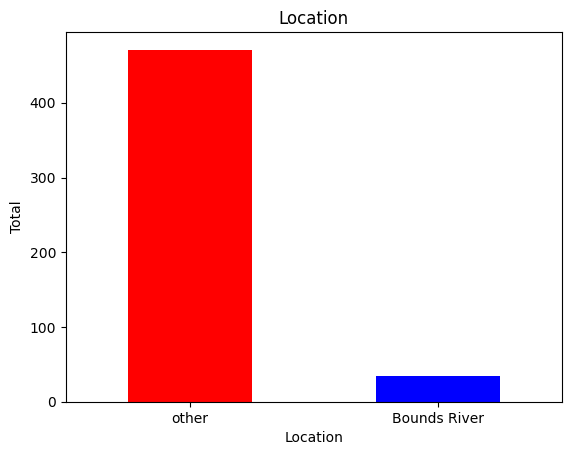

In [7]:
categories = ['other','Bounds River']
df.plot(kind='bar',x=categories,y =boston_df['CHAS'].value_counts(),color=['red','blue'])
plt.title('Location')
plt.ylabel('Total')
plt.xlabel('Location')
plt.gca().xaxis.set_ticklabels(categories,rotation=0)
plt.show()


Boxplot MEDV vs Age

In [8]:
def map_age(age):
    if age <= 35:
        cat =' <=35'
    else:
        if age <70:
            cat ='36-69'
        else:
            if age >= 70: 
                cat = '  >= 70'
    return cat


category=boston_df['AGE'].map(lambda x : map_age(x))    
            

<ipython-input-9-cb4f8ce53868>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category,y = boston_df['MEDV'],width=0.9,palette='Set2',order = [ ' <=35', '36-69', '  >= 70'] )


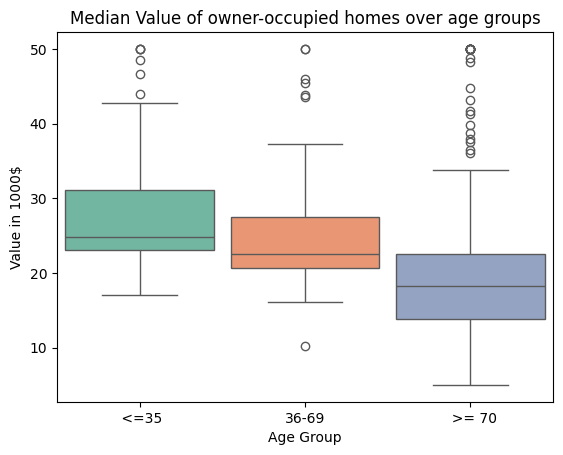

In [9]:
sns.boxplot(x=category,y = boston_df['MEDV'],width=0.9,palette='Set2',order = [ ' <=35', '36-69', '  >= 70'] )
plt.title('Median Value of owner-occupied homes over age groups')
plt.ylabel('Value in 1000$')
plt.xlabel('Age Group')
plt.show()

Scatter plot

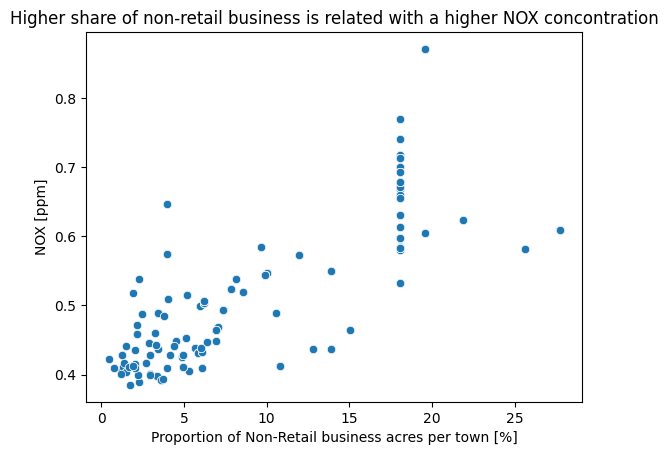

In [10]:
sns.scatterplot(x=boston_df['INDUS'],y=boston_df['NOX'])
plt.title('Higher share of non-retail business is related with a higher NOX concontration')
plt.ylabel('NOX [ppm]')
plt.xlabel('Proportion of Non-Retail business acres per town [%]')
plt.show()

Histogram

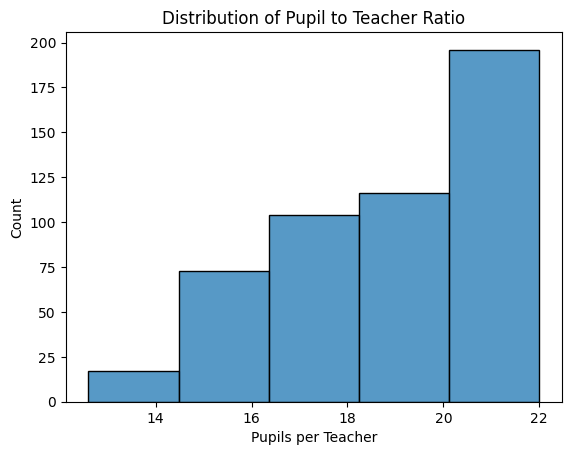

In [11]:
sns.histplot(boston_df['PTRATIO'],bins=5)
plt.title('Distribution of Pupil to Teacher Ratio')
plt.xlabel('Pupils per Teacher')
plt.show()

T-test

In [12]:

from scipy import stats


In [13]:
data_other=boston_df['MEDV'].loc[boston_df['CHAS']==0]
data_river=boston_df['MEDV'].loc[boston_df['CHAS']==1]
t_stat, p_value = stats.ttest_ind(data_river, data_other)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


Null_Hypothesis= 'There is no significant difference in median values of houses at the river or not.'
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in median values of houses at the river or not")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the two groups.")


T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
Reject the null hypothesis - There is a significant difference in median values of houses at the river or not


ANNOVA

In [14]:
df=boston_df[['MEDV','AGE']]
df['AGE']=df['AGE'].map(lambda x : round(x,0))
Value = boston_df['MEDV']
Group=boston_df['AGE']


model=ols('Value ~ C(Group)', data=df).fit()

<ipython-input-14-50dc026a35b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE']=df['AGE'].map(lambda x : round(x,0))


In [15]:

grouped_data = [group['MEDV'].values for name, group in df.groupby('AGE')]

In [16]:
#anova_table = sm.stats.anova_lm(model, typ=2)
#print(anova_table)

grouped_data = [group['MEDV'].values for name, group in df.groupby('AGE')]

f_stat, p_value = stats.f_oneway(*grouped_data)


print(f"P-Valuey: {p_value}")

alpha = 0.05

Null_Hypothesis= 'There is no significant difference between values of houses and share of old houses'
print('Null Hypothesis: ',Null_Hypothesis)
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between values of houses and share of old houses. House value diminishes with the share of old house")
else:
    print("Fail to reject the null hypothesis - ",Null_Hypothesis)

P-Valuey: 0.0008830517711295618
Null Hypothesis:  There is no significant difference between values of houses and share of old houses
Reject the null hypothesis - There is a significant difference between values of houses and share of old houses. House value diminishes with the share of old house


Pearson Correlation

In [17]:
from scipy.stats import pearsonr
corr, p_value= pearsonr(boston_df['NOX'], boston_df['INDUS'])


Null_Hypothesis= 'There is no significant difference between values of houses and share of old houses'

alpha = 0.05

print('P_Value:',p_value)



Null_Hypothesis= 'There is no significant linear relation between Nitrix Oxide Concentration and not-retail business concentration'
print('Null Hypothesis: ',Null_Hypothesis)
if p_value > alpha:
    print("Fail to reject the null hypothesis - There is no significant linear relation between Nitrix Oxide Concentration and not-retail business concentration. Still this does not prove that there is no realtionship. There is just no linear one")
else:
    print("Reject the null hypothesis - There is a significant linear relationship between between Nitrix Oxide Concentration and not-retail business concentration")

P_Value: 7.913361061210442e-98
Null Hypothesis:  There is no significant linear relation between Nitrix Oxide Concentration and not-retail business concentration
Reject the null hypothesis - There is a significant linear relationship between between Nitrix Oxide Concentration and not-retail business concentration


Regression

In [18]:
from sklearn.linear_model import LinearRegression
value=boston_df['MEDV']
distance=boston_df['DIS']

In [19]:
dist_add = sm.add_constant(distance)
model=sm.OLS(value,dist_add).fit()

In [20]:
p_value=model.pvalues.iloc[1]

Null_Hypothesis= 'There is no imact on distance home values to employment centers'
print('Null Hypothesis: ',Null_Hypothesis)
if p_value > alpha:
    print("Fail to reject the null hypothesis :",Null_Hypothesis )
else:
    print("Reject the null hypothesis  - There is a significant positive impact of a higher distance to an employment center")

Null Hypothesis:  There is no imact on distance home values to employment centers
Reject the null hypothesis  - There is a significant positive impact of a higher distance to an employment center


####